In [1]:
import torch
from torch import utils
from torchvision import datasets, transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def plot_svhn(images, shape):
    fig = plt.figure(figsize=shape[::-1], dpi=80)
    for j in range(1, len(images) + 1):
        ax = fig.add_subplot(shape[0], shape[1], j)
        ax.matshow(images[j - 1][0], cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

In [3]:
path='./SVHN_data'
svhn = datasets.SVHN(path, download=True).data
print (svhn.shape)

Using downloaded and verified file: ./SVHN_data/train_32x32.mat
(73257, 3, 32, 32)


In [4]:
# Расчитываем mean и std, применяем стандартизацию
train_mean = svhn.mean(axis=(0,2,3)) / 255
print ("Mean: ", train_mean)
train_std = svhn.std(axis=(0,2,3)) / 255
print ("Std: ", train_std)    
    
svhn_transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((train_mean), (train_std)),
           ])

Mean:  [0.4376821  0.4437697  0.47280442]
Std:  [0.19803012 0.20101562 0.19703614]


In [5]:
train_data = datasets.SVHN(path, download=True, transform=svhn_transform)
test_data = datasets.SVHN(path, download=True, transform=svhn_transform)

Using downloaded and verified file: ./SVHN_data/train_32x32.mat
Using downloaded and verified file: ./SVHN_data/train_32x32.mat


In [6]:
train_data[0][0]

tensor([[[-1.5567, -1.9131, -1.9131,  ..., -0.7844, -0.5863, -0.4477],
         [-1.6557, -1.9329, -1.9329,  ..., -1.4181, -0.8834, -0.5665],
         [-1.4181, -1.8537, -1.8933,  ..., -1.7547, -1.5171, -0.7844],
         ...,
         [-0.5071, -0.4873, -0.5863,  ..., -0.1507, -0.1507, -0.1705],
         [-0.5467, -0.5071, -0.5863,  ..., -0.0319, -0.1111, -0.1111],
         [-0.5269, -0.4477, -0.5269,  ..., -0.0121, -0.0517, -0.1705]],

        [[-1.6224, -1.7589, -1.8760,  ..., -0.9396, -0.7055, -0.6664],
         [-1.4468, -1.7199, -1.8175,  ..., -1.4468, -1.0761, -0.6860],
         [-1.4078, -1.7980, -1.8760,  ..., -1.6419, -1.3883, -0.8615],
         ...,
         [-0.6274, -0.6079, -0.6664,  ..., -0.1787, -0.1592, -0.1592],
         [-0.5299, -0.6664, -0.7250,  ..., -0.1982, -0.1592, -0.1787],
         [-0.4909, -0.6079, -0.6664,  ..., -0.1787, -0.1592, -0.1397]],

        [[-1.6433, -2.0214, -2.0214,  ..., -1.2850, -1.2651, -1.2253],
         [-1.7030, -1.9617, -2.0612,  ..., -1

In [10]:
# Проверка данных после стандартизации
im = [train_data[i][0] for i in range(len(svhn))]
trdata = torch.stack(im).float()
print ("Transformed data mean: {:.8}".format(trdata.mean()))
print ("Transformed data std: {:.8}".format(trdata.std()))

Transformed data mean: 8.2850832e-08
Transformed data std: 1.0


In [8]:
images = [train_data[i][0] for i in range(50)]

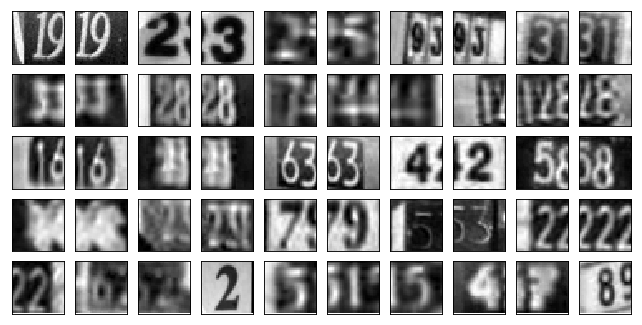

In [9]:
plot_svhn(images, (5, 10))

In [12]:
images[0][0].shape

torch.Size([32, 32])

In [13]:
train_loader = utils.data.DataLoader(train_data, batch_size=50, shuffle=True)

In [14]:
batch_x, batch_y = next(iter(train_loader))

In [15]:
batch_x.shape

torch.Size([50, 3, 32, 32])

In [16]:
batch_y

tensor([ 5,  2,  6,  0,  7,  1,  1,  3,  2,  5,  1,  3,  4,  4,
         7,  4,  2,  9,  7,  7,  5,  0,  1,  4,  9,  6,  8,  1,
         0,  4,  7,  5,  6,  4,  3,  2,  1,  6,  5,  4,  1,  4,
         1,  2,  2,  2,  6,  3,  1,  6])